In [5]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
dataframe = pd.read_csv('clust_data.csv')
# print(dataframe)
data = dataframe.values
# print(data)
print(data)

[[ 1.44841669  2.19443374  0.25348355 ...  2.5809965   3.32192527
   1.56953087]
 [ 2.61182057  2.88085545  1.03660612 ...  2.76817874  2.21616106
   1.74273062]
 [ 4.76414812  3.16321623  1.32330962 ...  2.46376759  4.57572752
   0.23683691]
 ...
 [ 2.77204422  3.57701627  1.37448358 ...  0.6052303  -0.51545966
   0.74657833]
 [ 4.05342542  3.96409053  2.21379044 ...  1.60924091 -0.11722843
   2.79662246]
 [ 2.46785009  3.10000977  0.77577883 ...  2.55275432  0.53776375
   1.51098732]]


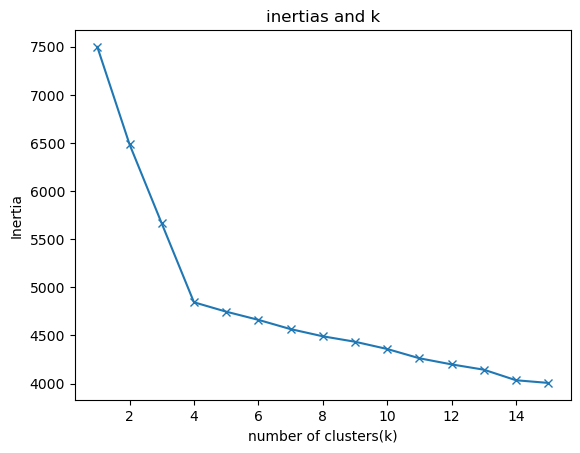

In [43]:
def find_best_k(data):
    inertias = []
    k_range = [k for k in range(1,15+1)]                    # initialize xlabel and we will apply k-means 15 times

    for k in k_range:
        kmeans = KMeans(n_clusters = k, n_init = 10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.plot(k_range, inertias, 'x-')
    plt.xlabel('number of clusters(k)')
    plt.ylabel('Inertia')
    plt.title('inertias and k')
    plt.show()
find_best_k(data)

In [29]:
# from the graph we can see that the elbow point appears when k = 4
# reapply kmeans 
optimal_k = 4
kmeans = KMeans(n_clusters = optimal_k, n_init = 10)
kmeans.fit(data)
labels = kmeans.labels_
print(labels)

# get number of elements in each cluster
for i in range(optimal_k):
    number = len([y for y in labels if y == i])
    print(f'observations in class {i} is {number}')
print(f'inertia when k = {k} is: {kmeans.inertia_}')


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
observations in class 0 is 25
observations in class 1 is 25
observations in class 2 is 25
observations in class 3 is 25
inertia when k = 4 is: 4844.925817623823


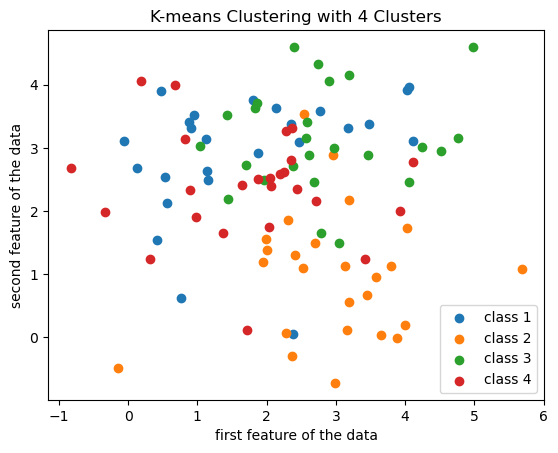

In [38]:
# visualize the data
for i in range(optimal_k):
    idx = [j for j in range(len(data)) if labels[j] == i]
    each_cluster = data[idx]
    # print(each_cluster)
    plt.scatter(each_cluster[:,0], each_cluster[:,1])
plt.legend([f'class {i}' for i in range(1,optimal_k+1)])
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel('first feature of the data')
plt.ylabel('second feature of the data')
plt.show()